# Data Visualization

Salganik, M. J., Dodds, P. S., & Watts, D. J. (2006). Experimental Study of Inequality and Unpredictability in an Artificial Cultural Market. Science, 311(5762), 854–856. https://doi.org/10.1126/science.1121066
- The experiment shows that social influence leads to inequality and unpredictability in the cultural market. Although there are differences between the experiment and the real cultural market, the results still show that social influence plays an important role in the formation of the cultural market. In addition, although network-based experiments are difficult to control, they have methodological advantages in studying collective social processes such as the formation of cultural markets


## Author's introduction to the data
### Data Release
Included in data release are 167 data files containing the experimental results, mp3 files from the 48 songs, and the data documentation. The data files are in the ascii text, comma separated values(csv) format.

These data files are to reproduce, and hopefully expand upon, the analysis conducted in the dissertation project by Matthew J. Salganik, supervised by Duncan J. Watts. The experiments were conducted at the Department of Sociology at Columbia University between 2004 and 2007.

Please direct any questions to Prof. Matthew Salganik.

### References
- Salganik, M.J., Dodds, P.S., and Watts, D.J. 2006. "Experimental study of inequality and unpredictability in an artificial cultural market." Science, 311:854-856. http://dx.doi.org/10.1126/science.1121066
- Salganik, M.J. and Watts, D.J. 2008. "Leading the herd astray: An experimental study of self-fulfilling prophecies in an artificial cultural market." Social Psychology Quarterly, 71:338-355. http://dx.doi.org/10.1177/019027250807100404
- Salganik, M.J. and Watts, D.J. 2009. "Web-based experiments for the study of collective social dynamics in cultural markets." Topics in Cognitive Science, 1:439-468. http://dx.doi.org/10.1111/j.1756-8765.2009.01030.x
- Salganik, M.J. and Watts, D.J. 2009. "The puzzling nature of success in cultural markets." in The Oxford Handbook of Analytical Sociology, Peter Hedstrom and Peter Bearman (eds.), Oxford: Oxford University Press.
- Salganik, MJ. 2007. Success and failure in cultural markets. Doctoral dissertation. Department of Sociology, Columbia University.

## Figure 1 

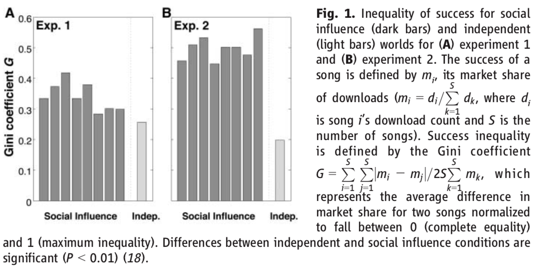

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import itertools
import numpy as np
import random
from scipy import stats
import scipy.stats as ss


In [2]:
file_path = "E:/数据/musiclab_opendata/musiclab_data/"

In [3]:
column_names = ['song_id', 'downloads_in_world1',
                  'downloads_in_world2', 'downloads_in_world3',
                  'downloads_in_world4', 'downloads_in_world5', 
                  'downloads_in_world6', 'downloads_in_world7', 
                  'downloads_in_world8', 'downloads_in_world_independent']

df1 = pd.read_csv(f'{file_path}downloads_v1_lexorder.txt',  names=column_names )

df1.head()

,song_id,downloads_in_world1,downloads_in_world2,downloads_in_world3,downloads_in_world4,downloads_in_world5,downloads_in_world6,downloads_in_world7,downloads_in_world8,downloads_in_world_independent
0,100102,15,10,18,40,14,25,37,28,44
1,123111,18,14,14,14,8,12,18,29,35
2,131405,7,10,12,9,5,14,14,10,20
3,144102,11,16,12,16,15,17,16,21,37
4,165411,9,32,8,18,9,19,23,20,38


In [4]:
# load the data of downloads_v2_lexorder.txt as df2 below
df2 = pd.read_csv(f'{file_path}downloads_v2_lexorder.txt',  names=column_names )
df2.head()

,song_id,downloads_in_world1,downloads_in_world2,downloads_in_world3,downloads_in_world4,downloads_in_world5,downloads_in_world6,downloads_in_world7,downloads_in_world8,downloads_in_world_independent
0,100102,9,10,5,37,20,23,27,6,59
1,123111,15,9,11,10,10,9,17,13,61
2,131405,8,8,9,9,15,21,6,34,51
3,144102,11,21,9,24,10,16,12,27,45
4,165411,15,31,5,27,21,28,14,10,65


In [5]:
# Calculate the gini coefficient
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

In [6]:
worlds = ['downloads_in_world1',
    'downloads_in_world2', 'downloads_in_world3',
    'downloads_in_world4', 'downloads_in_world5', 
    'downloads_in_world6', 'downloads_in_world7', 
    'downloads_in_world8', 'downloads_in_world_independent'] 

gini_list1 = []
for i in worlds:
    # Calculate the gini coefficient in each world in Experiment 1
    print(gini(df1[i]))
    gini_list1.append(gini(df1[i]))


0.3343797564687976
0.37385091926458835
0.4175204918032787
0.3333572522005358
0.37883554083885207
0.2837658898305085
0.3002015465613689
0.2998829873829874
0.2438212927756654


In [7]:
gini_list2 = []
for i in worlds:
    # Calculate the gini coefficient in each world in Experiment 2
    # Print out the calculation results
    # And append to gini_list2
    print(gini(df2[i]))
    gini_list2.append(gini(df2[i]))
    

0.4568437806072478
0.5090823002754821
0.5321842301943199
0.4461128739800544
0.5019724977457168
0.5013090166844161
0.47546779808529155
0.5611936936936937
0.18721487226277372


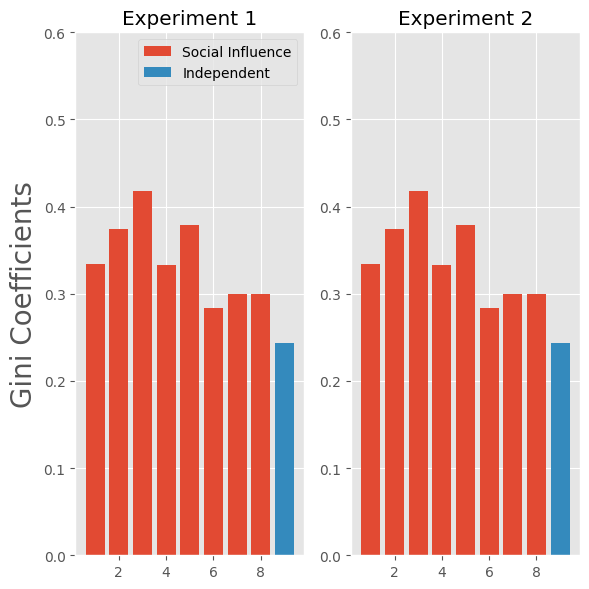

In [8]:
matplotlib.style.use('ggplot')

plt.figure(figsize = [6, 6])
plt.subplot(121)

# gini_list1[:-1]: exclude the last element in list
# range(1,9): exclude 9, means [1,8]
plt.bar(range(1,9) ,gini_list1[:-1], label = 'Social Influence')
# last element
plt.bar(9, gini_list1[-1], label = 'Independent')

plt.ylabel('Gini Coefficients', fontsize = 20)
plt.legend()
plt.ylim([0, 0.6])
plt.title('Experiment 1')

plt.subplot(122)
plt.bar(range(1,9) ,gini_list1[:-1])
plt.bar(9, gini_list1[-1])
plt.ylim([0, 0.6])
plt.title('Experiment 2')
plt.tight_layout()


## Figure 2 

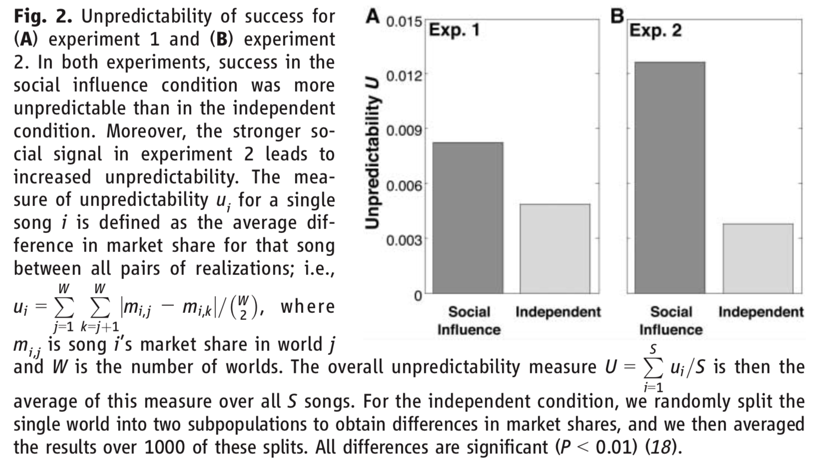

In [9]:
for i in itertools.combinations(worlds[:-1], 2):
    print(i)

('downloads_in_world1', 'downloads_in_world2')
('downloads_in_world1', 'downloads_in_world3')
('downloads_in_world1', 'downloads_in_world4')
('downloads_in_world1', 'downloads_in_world5')
('downloads_in_world1', 'downloads_in_world6')
('downloads_in_world1', 'downloads_in_world7')
('downloads_in_world1', 'downloads_in_world8')
('downloads_in_world2', 'downloads_in_world3')
('downloads_in_world2', 'downloads_in_world4')
('downloads_in_world2', 'downloads_in_world5')
('downloads_in_world2', 'downloads_in_world6')
('downloads_in_world2', 'downloads_in_world7')
('downloads_in_world2', 'downloads_in_world8')
('downloads_in_world3', 'downloads_in_world4')
('downloads_in_world3', 'downloads_in_world5')
('downloads_in_world3', 'downloads_in_world6')
('downloads_in_world3', 'downloads_in_world7')
('downloads_in_world3', 'downloads_in_world8')
('downloads_in_world4', 'downloads_in_world5')
('downloads_in_world4', 'downloads_in_world6')
('downloads_in_world4', 'downloads_in_world7')
('downloads_i

In [10]:
# Calculate social influence
def get_U(df):
    u_list = []
    for i in df.index:
        song = df['song_id'][i]
        song_diff = 0
        num = 0
        for j,k in itertools.combinations(worlds[:-1], 2):
            mij = df[j][i]/df[j].sum()
            mik = df[k][i]/df[k].sum()
            song_diff += abs(mij-mik)
            num += 1
        ui = song_diff/num
        u_list.append(ui) 
    U = np.sum(u_list)/len(u_list)
    return U

U1, U2 = get_U(df1), get_U(df2)

In [11]:
columns = ['user_id', 'world_id']
for i in range(1, 49):
    columns.append('song_'+str(i))
columns

df1w9 = pd.read_csv(f'{file_path}dynamics_downloads_w9_v1.txt', skiprows=8, names = columns)
# load dynamics_downloads_w9_v2.txt
df2w9 = pd.read_csv(f'{file_path}dynamics_downloads_w9_v2.txt', skiprows=8, names = columns)

In [12]:
df1w9[:3]

,user_id,world_id,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,...,song_39,song_40,song_41,song_42,song_43,song_44,song_45,song_46,song_47,song_48
0,72,9,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,75,9,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,77,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Calculate independent
def get_split_U(df_independent):
    sample1 = random.sample(df_independent.index.tolist(), round(len(df_independent)/2) )
    sample2 = [i for i in df_independent.index if i not in sample1]

    dat1 = df_independent[df_independent.index.isin(sample1)]
    dat2 = df_independent[df_independent.index.isin(sample2)]

    songs = ['song_'+str(i) for i in range(1, 49)]
    dij = [dat1[i].sum() for i in songs]
    dik = [dat2[i].sum() for i in songs]

    mij = [i/np.sum(dij) for i in dij]
    mik = [i/np.sum(dik) for i in dik]
    u_list = abs(np.array(mij)-np.array(mik))
    U = np.sum(u_list)/len(u_list)
    return U

In [14]:
U_independent_1 =[] 
for i in range(1000):
    if i % 100 == 0:
        print(i)
    U_independent_1.append(get_split_U(df1w9))

0
100
200
300
400
500
600
700
800
900


In [15]:
U_independent_2 =[] 
for i in range(1000):
    if i % 100 == 0:
        print(i)
    U_independent_2.append(get_split_U(df2w9))

0
100
200
300
400
500
600
700
800
900


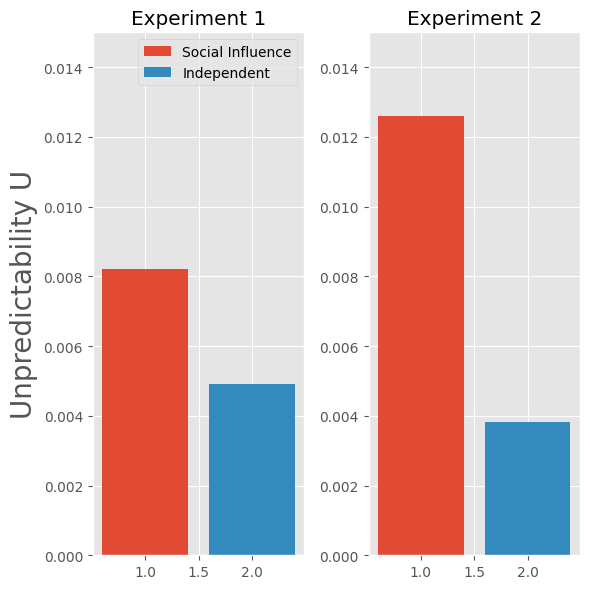

In [16]:
plt.figure(figsize = [6, 6])

plt.subplot(121)
plt.bar(1, U1, label = 'Social Influence')
plt.bar(2, np.mean(U_independent_1), label = 'Independent')
plt.ylabel('Unpredictability U', fontsize = 20)
plt.legend()
plt.ylim([0, 0.015])
plt.title('Experiment 1')

plt.subplot(122)
plt.bar(1, U2, label = 'Social Influence')
plt.bar(2, np.mean(U_independent_2), label = 'Independent')
plt.ylim([0, 0.015])
plt.title('Experiment 2')
plt.tight_layout()


In [17]:
# Using ttest_1samp to t-test U_independent_1, U1
r = stats.ttest_1samp(U_independent_1, U1, axis=0)
print("statistic:", r.__getattribute__("statistic"))
print("pvalue:", r.__getattribute__("pvalue"))

statistic: -187.01686410316321
pvalue: 0.0


In [18]:
r = stats.ttest_1samp(U_independent_2, U2, axis=0)
print("statistic:", r.__getattribute__("statistic"))
print("pvalue:", r.__getattribute__("pvalue"))

statistic: -593.4402979253875
pvalue: 0.0


In [19]:
r = stats.ttest_ind(U_independent_1, U_independent_2)
print("statistic:", r.__getattribute__("statistic"))
print("pvalue:", r.__getattribute__("pvalue"))

statistic: 46.7675762017195
pvalue: 4e-323


## Figure 3 

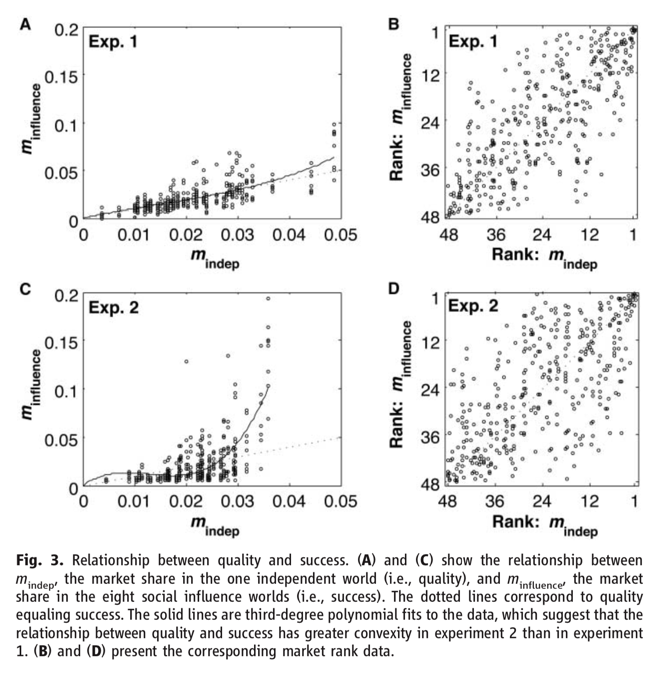

In [20]:
worlds = ['downloads_in_world1',
    'downloads_in_world2', 'downloads_in_world3',
    'downloads_in_world4', 'downloads_in_world5', 
    'downloads_in_world6', 'downloads_in_world7', 
    'downloads_in_world8', 'downloads_in_world_independent'] 


data1 = []
data1_rank = []
for i in df1.index:
    for j in worlds[:-1]:
        m_inf = df1[j][i]/df1[j].sum()
        m_ind = df1[worlds[-1]][i]/df1[worlds[-1]].sum()
        
        m_inf_rank = ss.rankdata(df1[j])[i]
        m_ind_rank = ss.rankdata(df1[worlds[-1]])[i]
        data1.append((m_inf, m_ind ))
        data1_rank.append((m_inf_rank, m_ind_rank))


data2 = []
data2_rank = []
for i in df2.index:
    for j in worlds[:-1]:
        m_inf = df2[j][i]/df2[j].sum()
        m_ind = df2[worlds[-1]][i]/df2[worlds[-1]].sum()
        m_inf_rank = ss.rankdata(df2[j])[i]
        m_ind_rank = ss.rankdata(df2[worlds[-1]])[i]
        data2.append((m_inf, m_ind ))
        data2_rank.append((m_inf_rank, m_ind_rank))


m_infs1 = [i for i,j in data1]
m_inds1 = [j for i,j in data1]
m_infs2 = [i for i,j in data2]
m_inds2 = [j for i,j in data2]

m_infs1_rank = [i for i,j in data1_rank]
m_inds1_rank = [j for i,j in data1_rank]
m_infs2_rank = [i for i,j in data2_rank]
m_inds2_rank = [j for i,j in data2_rank]

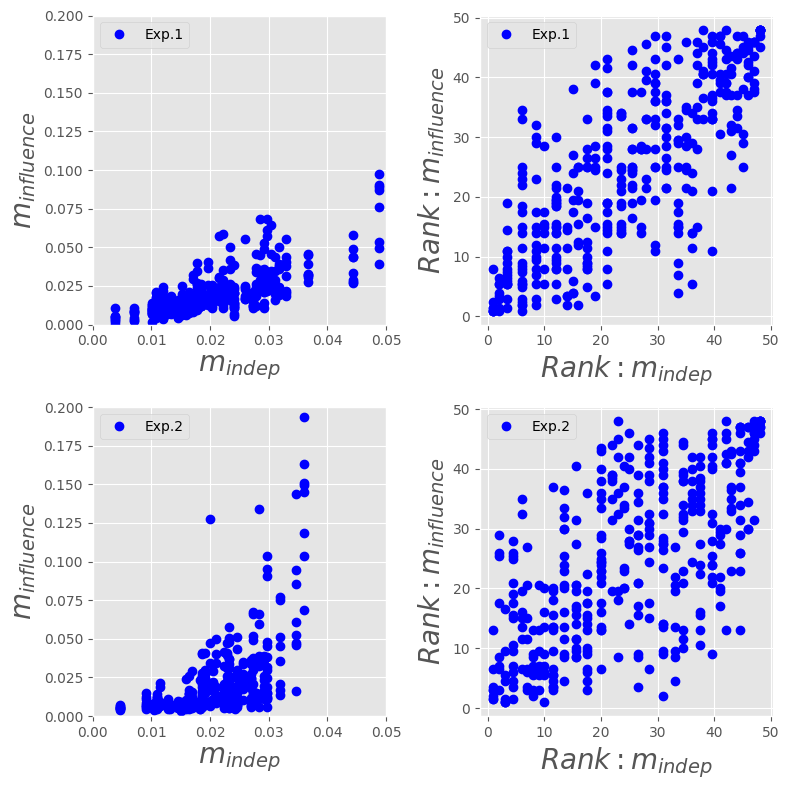

In [21]:
plt.figure(figsize = [8, 8])

plt.subplot(221)
plt.plot(m_inds1, m_infs1, 'bo', label ='Exp.1')
plt.ylim([0, 0.2])
plt.xlim([0, 0.05])
plt.ylabel('$m_{influence}$', fontsize = 20)
plt.xlabel('$m_{indep}$', fontsize = 20)
plt.legend(loc='upper left')

plt.subplot(222)
plt.plot(m_inds1_rank, m_infs1_rank, 'bo', label ='Exp.1')
plt.ylabel('$Rank: m_{influence}$', fontsize = 20)
plt.xlabel('$Rank: m_{indep}$', fontsize = 20)

plt.legend(loc='upper left')

plt.subplot(223)
plt.plot(m_inds2, m_infs2, 'bo', label ='Exp.2')
plt.ylim([0, 0.2])
plt.xlim([0, 0.05])
plt.ylabel('$m_{influence}$', fontsize = 20)
plt.xlabel('$m_{indep}$', fontsize = 20)
plt.legend(loc='upper left')

plt.subplot(224)
plt.plot(m_inds2_rank, m_infs2_rank, 'bo', label ='Exp.2')
plt.ylabel('$Rank: m_{influence}$', fontsize = 20)
plt.xlabel('$Rank: m_{indep}$', fontsize = 20)

plt.legend(loc='upper left')

plt.tight_layout()